In [1]:
# Title= 
'''
IN-DEPTH ANALYSIS OF ADIDAS SALES OPERATING PROFIT (2020-2021)

'''

# Introduction = 
'''
In this analysis,I  aim to evaluate the operating profit trends of Adidas across different regions 
for the years 2020 and 2021. By examining the percentage change in operating profit, I set out to
uncover which regions thrived and which faced challenges during this time. 

Understanding these trends is not just a numbers game; it's essential for making informed business
decisions. This insight will allow Adidas as a manufacturing company to allocate resources more
effectively, optimize product offerings, and tailor marketing strategies to meet the unique needs
of each region. Ultimately, this analysis serves as a foundation for driving growth and improving 
overall financial performance, helping the company as whole navigate the ever-changing landscape of 
the retail market.

'''


In [2]:
#importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the dataset in to notebook

adidas_sales_data = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\ADIDDASSALESSQLCLEANEDDATA.csv")


In [4]:
# the first 5 rows of the dataset

adidas_sales_data.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [5]:
# Checkinf for missing values 

adidas_sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   int64  
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   int64  
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 980.0+ KB


In [6]:
# checking the list of columns in adidas_sales_data 

print(adidas_sales_data.columns)


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')


In [39]:
# trying to Replace spaces in all column names with underscores
adidas_sales_data.columns = adidas_sales_data.columns.str.replace(' ', '_')

# Ensuring the correct format for 'Invoice_Date' column name if needed
adidas_sales_data.rename(columns={'Invoice_Date': 'Invoice_date'}, inplace=True)
print(adidas_sales_data.columns)

Index(['Retailer', 'Retailer_ID', 'Invoice_date', 'Region', 'State', 'City',
       'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales',
       'Operating_Profit', 'Operating_Margin', 'Sales_Method', 'Year'],
      dtype='object')


In [40]:
# Extracting the year from 'Invoice_date'
adidas_sales_data['Year'] = pd.to_datetime(adidas_sales_data['Invoice_date']).dt.year

# Calculation total operating profit for each year
total_profit = adidas_sales_data.groupby('Year')['Operating_Profit'].sum().reset_index()

# results
print(total_profit)



   Year  Operating_Profit
0  2020      6.337566e+07
1  2021      2.687591e+08


In [20]:
# Analysis of the results in percentages
profit_2020 = total_profit[total_profit['Year'] == 2020]['Operating_Profit'].values[0]  
profit_2021 = total_profit[total_profit['Year'] == 2021]['Operating_Profit'].values[0]  
percentage_change = ((profit_2021 - profit_2020) / profit_2020) * 100

print(f'Total Operating Profit for 2020: ${profit_2020:.2f}')  # Formatting for currency
print(f'Total Operating Profit for 2021: ${profit_2021:.2f}')  # Formatting for currency
print(f'Percentage Change from 2020 to 2021: {percentage_change:.2f}%')


Total Operating Profit for 2020: $63375662.58
Total Operating Profit for 2021: $268759098.87
Percentage Change from 2020 to 2021: 324.07%


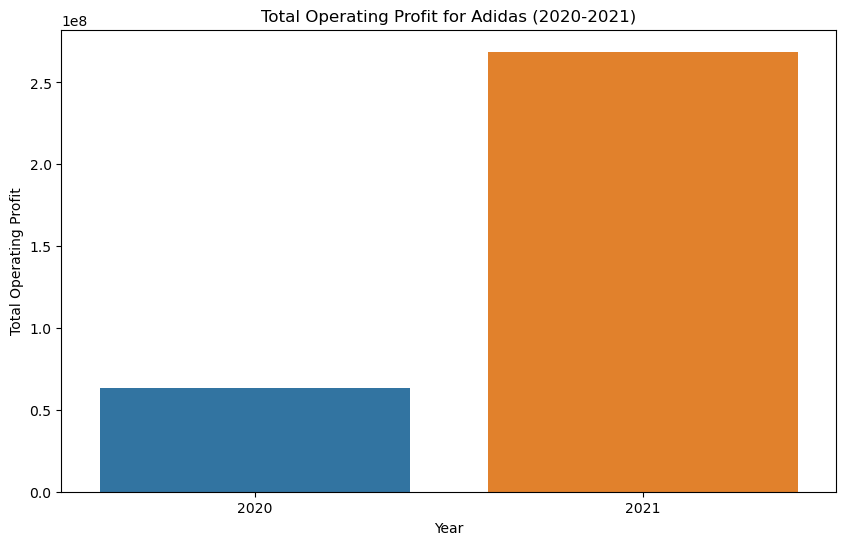

In [8]:
# Bar plot for total operating profit

# creating fig. size
plt.figure(figsize=(10, 6))

sns.barplot(x='Year', y='Operating_Profit', data=total_profit)  
plt.title('Total Operating Profit for Adidas (2020-2021)')
plt.xlabel('Year')
plt.ylabel('Total Operating Profit')

plt.show()

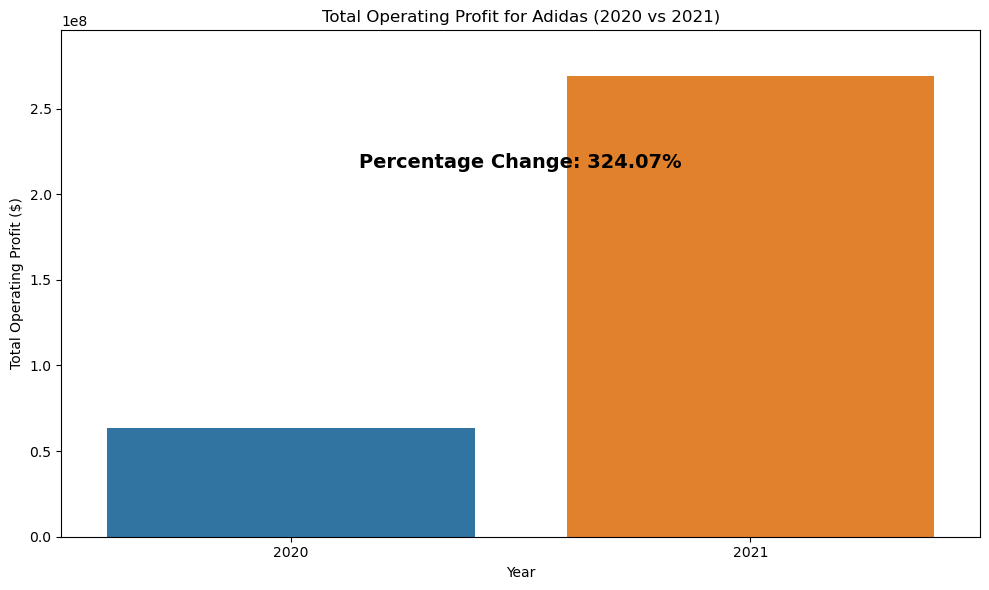

In [10]:
# Data preparation
years = ['2020', '2021']
profits = [profit_2020, profit_2021]

# Creating a fig. size
plt.figure(figsize=(10, 6))

# Bar plot for total operating profit by year
sns.barplot(x=years, y=profits, )  
plt.title('Total Operating Profit for Adidas (2020 vs 2021)')
plt.xlabel('Year')
plt.ylabel('Total Operating Profit ($)')
plt.ylim(0, max(profits) * 1.1)  

# percentage change
plt.text(0.5, max(profits) * 0.8, f'Percentage Change: {percentage_change:.2f}%', 
         ha='center', fontsize=14, color='black', weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# total operating profit for each region group by Year
profit_by_region = adidas_sales_data.groupby(['Year', 'Region'])['Operating_Profit'].sum().reset_index()

# results
profit_by_region


,Year,Region,Operating_Profit
0,2020,Midwest,2670229.76
1,2020,Northeast,14222794.31
2,2020,South,9845141.06
3,2020,Southeast,12168619.11
4,2020,West,24468878.34
5,2021,Midwest,50141116.72
6,2021,Northeast,53797793.34
7,2021,South,51292863.01
8,2021,Southeast,48386797.59
9,2021,West,65140528.21


In [21]:
# calculation of percentage change
profit_pivot = profit_by_region.pivot(index='Region', columns='Year', values='Operating_Profit').reset_index() 
profit_pivot['Percentage Change'] = ((profit_pivot[2021] - profit_pivot[2020]) / profit_pivot[2020]) * 100

#'Percentage Change' to 2 decimal places
profit_pivot['Percentage Change'] = profit_pivot['Percentage Change'].round(2)

# result
profit_pivot


Year,Region,2020,2021,Percentage Change
0,Midwest,2670229.76,50141116.72,1777.78
1,Northeast,14222794.31,53797793.34,278.25
2,South,9845141.06,51292863.01,421.00
3,Southeast,12168619.11,48386797.59,297.64
4,West,24468878.34,65140528.21,166.22


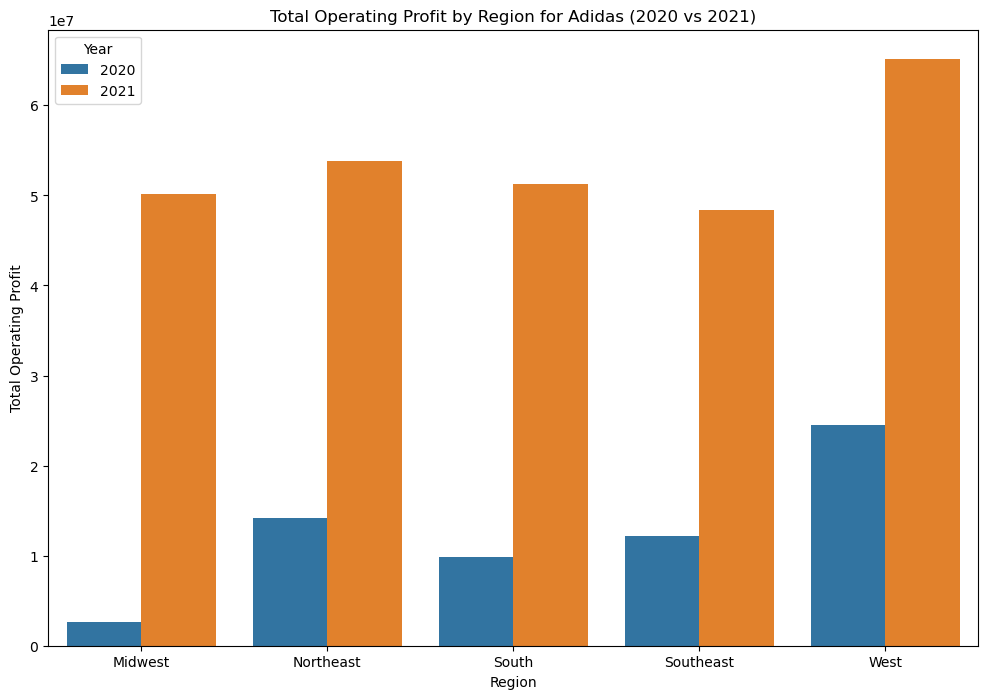

In [12]:
# Plotting Operating Profit by Region for each year

# creating fig. size
plt.figure(figsize=(12, 8))

sns.barplot(x='Region', y='Operating_Profit', hue='Year', data=profit_by_region)  
plt.title('Total Operating Profit by Region for Adidas (2020 vs 2021)')
plt.xlabel('Region')
plt.ylabel('Total Operating Profit')
plt.legend(title='Year')

plt.show()


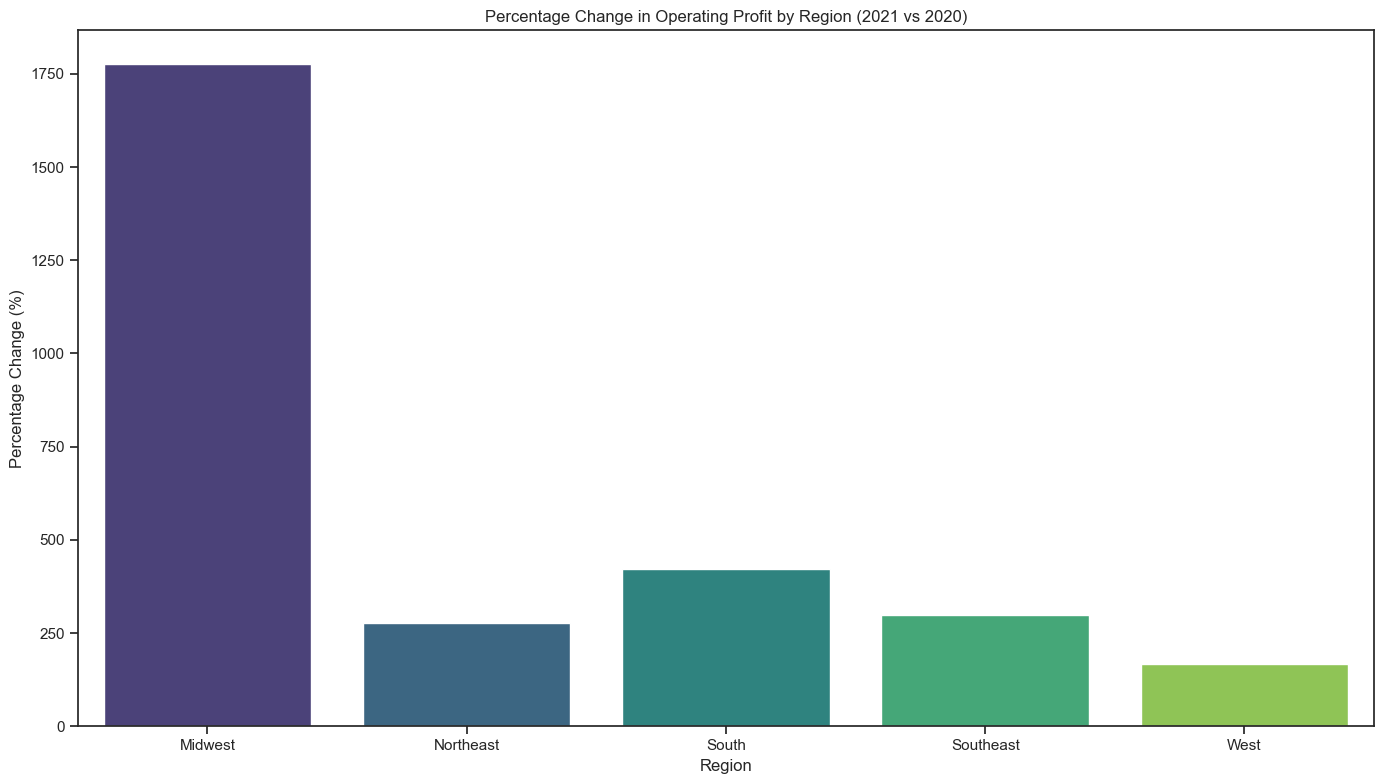

In [23]:
# Ensure the pivoted data for percentage change is ready
profit_pivot = profit_by_region.pivot(index='Region', columns='Year', values='Operating_Profit').reset_index()
profit_pivot['Percentage Change'] = ((profit_pivot[2021] - profit_pivot[2020]) / profit_pivot[2020]) * 100
profit_pivot['Percentage Change'] = profit_pivot['Percentage Change'].round(2)

# style for the plots
sns.set(style="ticks")

# Create figure size
plt.figure(figsize=(14, 8))

# Bar plot for Percentage Change by Region
sns.barplot(x='Region', y='Percentage Change', data=profit_pivot, palette='viridis')

plt.title('Percentage Change in Operating Profit by Region (2021 vs 2020)')
plt.xlabel('Region')
plt.ylabel('Percentage Change (%)')

# Remove grid lines
plt.grid(False)


plt.tight_layout()
plt.show()


In [15]:
# total operating profit for each product
profit_by_product = adidas_sales_data.groupby(['Year', 'Product'])['Operating_Profit'].sum().reset_index() 

# results
profit_by_product


,Year,Product,Operating_Profit
0,2020,Men's Apparel,9660070.37
1,2020,Men's Athletic Footwear,9359256.91
2,2020,Men's Street Footwear,15558837.44
3,2020,Women's Apparel,11302905.22
4,2020,Women's Athletic Footwear,8290741.17
5,2020,Women's Street Footwear,9203851.47
6,2021,Men's Apparel,35102959.96
7,2021,Men's Athletic Footwear,42487631.28
8,2021,Men's Street Footwear,67243423.18
9,2021,Women's Apparel,57348065.34


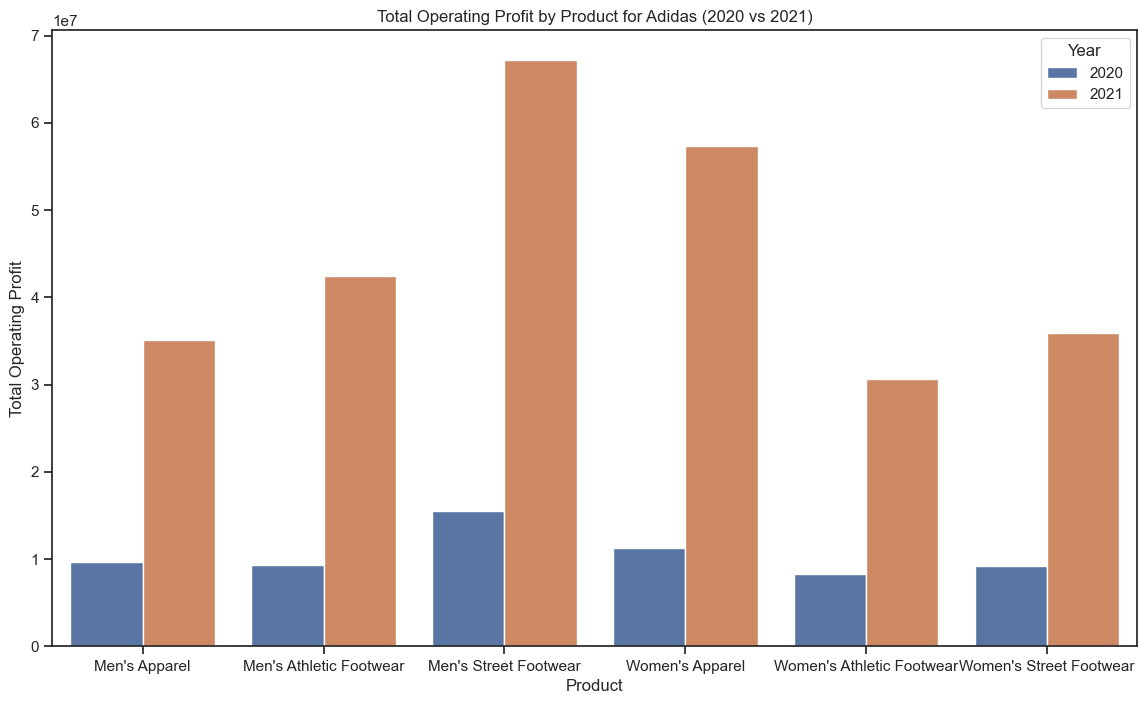

In [16]:
# Plotting Operating Profit by Product for each year

# creating fig. size
plt.figure(figsize=(14, 8))

sns.barplot(x='Product', y='Operating_Profit', hue='Year', data=profit_by_product)  # Changed 'Operating Profit' to 'Operating_Profit'
plt.title('Total Operating Profit by Product for Adidas (2020 vs 2021)')
plt.xlabel('Product')
plt.ylabel('Total Operating Profit')
plt.legend(title='Year')

plt.show()


In [17]:
# Pivot data
'''
In this section of the analysis, I focus on calculating the percentage change in operating profit
for each product offered by Adidas between 2020 and 2021. By pivoting the data, I restructure it to 
have products as rows and the corresponding operating profits for each year as columns. This allows 
me to easily compare the performance of each product over the two years.

The percentage change is then calculated to understand how each product's profitability has evolved.
This information is crucial, as it helps identify which products are thriving and which may need 
attention or re-evaluation. Ultimately, this analysis informs strategic decisions, such as product 
development and marketing efforts, to enhance Adidas's overall performance in a competitive market.

'''






profit_product_pivot = profit_by_product.pivot(index='Product', columns='Year', values='Operating_Profit').reset_index() 

# Calculation of percentage change between 2021 and 2020
profit_product_pivot['Percentage Change'] = ((profit_product_pivot[2021] - profit_product_pivot[2020]) / profit_product_pivot[2020]) * 100

# Rounding the 'Percentage Change' to 2 decimal places
profit_product_pivot['Percentage Change'] = profit_product_pivot['Percentage Change'].round(2)

# Display the percentage change
profit_product_pivot


Year,Product,2020,2021,Percentage Change
0,Men's Apparel,9660070.37,35102959.96,263.38
1,Men's Athletic Footwear,9359256.91,42487631.28,353.96
2,Men's Street Footwear,15558837.44,67243423.18,332.19
3,Women's Apparel,11302905.22,57348065.34,407.37
4,Women's Athletic Footwear,8290741.17,30685043.77,270.11
5,Women's Street Footwear,9203851.47,35891975.34,289.97


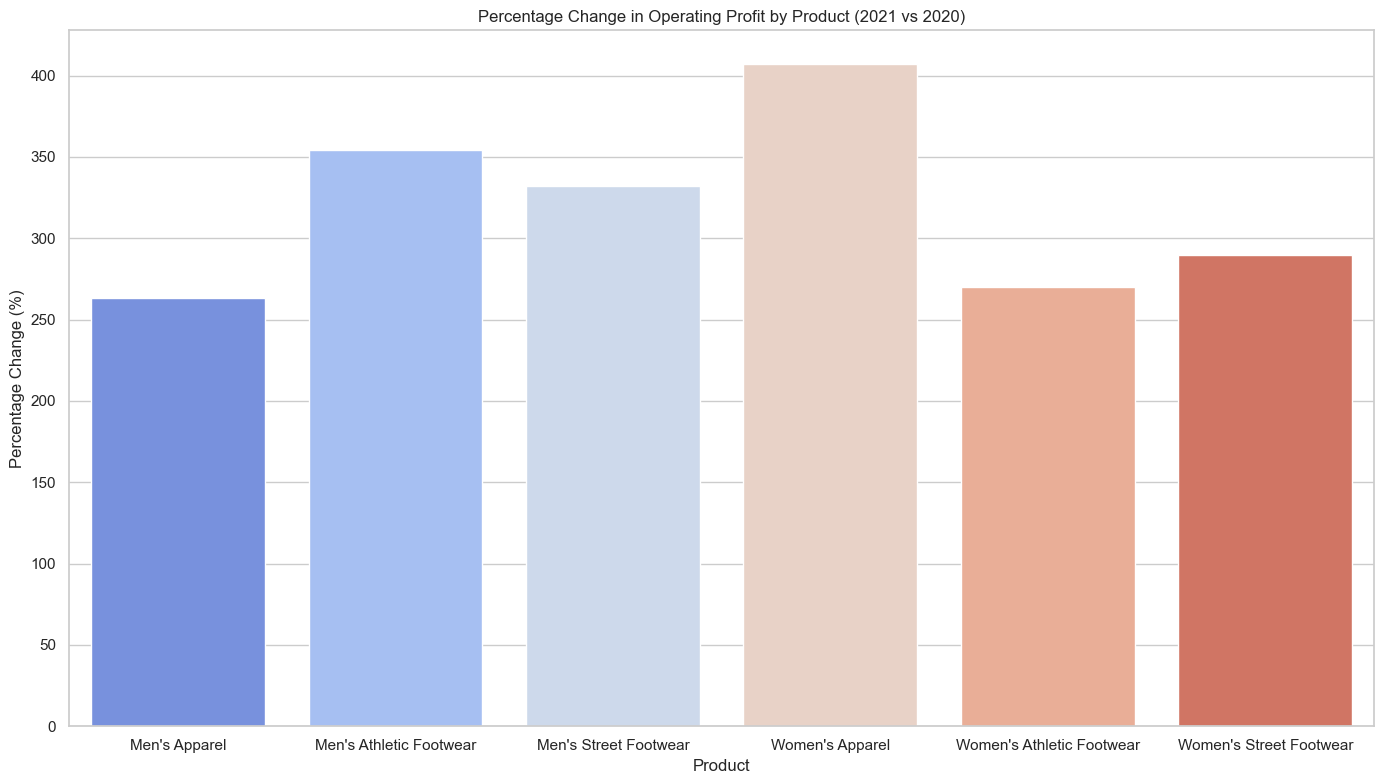

In [18]:
# the style for the plots
sns.set(style="whitegrid")

# Creating a fig. size
plt.figure(figsize=(14, 8))

# Bar plot for Percentage Change by Product
sns.barplot(x='Product', y='Percentage Change', data=profit_product_pivot, palette='coolwarm')
plt.title('Percentage Change in Operating Profit by Product (2021 vs 2020)')
plt.xlabel('Product')
plt.ylabel('Percentage Change (%)')
plt.xticks() 

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
# total operating profit by Sales Method for each year
profit_by_sales_method = adidas_sales_data.groupby(['Year', 'Sales_Method'])['Operating_Profit'].sum().reset_index()

# results
profit_by_sales_method


,Year,Sales_Method,Operating_Profit
0,2020,In-store,31595550.00
1,2020,Online,2116486.24
2,2020,Outlet,29663626.34
3,2021,In-store,95995737.50
4,2021,Online,94438690.23
5,2021,Outlet,78324671.14


In [27]:
# total operating profit by Retailer for each year

profit_by_retailer = adidas_sales_data.groupby(['Year', 'Retailer'])['Operating_Profit'].sum().reset_index()
print(profit_by_retailer)

    Year       Retailer  Operating_Profit
0   2020    Foot Locker       15668783.12
1   2020         Kohl's         303266.17
2   2020  Sports Direct        5789934.04
3   2020        Walmart       12156539.52
4   2020      West Gear       29457139.73
5   2021         Amazon       28818503.31
6   2021    Foot Locker       65053341.69
7   2021         Kohl's       36507986.41
8   2021  Sports Direct       68543020.92
9   2021        Walmart       13625513.09
10  2021      West Gear       56210733.45


In [28]:
# Showcasing the most profitable RETAILER for each year
most_profitable_retailer = profit_by_retailer.loc[profit_by_retailer.groupby('Year')['Operating_Profit'].idxmax()]

# result
most_profitable_retailer


,Year,Retailer,Operating_Profit
4,2020,West Gear,29457139.73
8,2021,Sports Direct,68543020.92


In [29]:
# total operating profit by Region and Sales Method for each year
profit_by_region_sales_method = adidas_sales_data.groupby(['Year', 'Region', 'Sales_Method'])['Operating_Profit'].sum().reset_index()

# profit distribution across regions and sales methods
profit_region_sales_pivot = profit_by_region_sales_method.pivot_table(index='Region', columns=['Year', 'Sales_Method'], values='Operating_Profit')

# result
profit_region_sales_pivot


Year                2020                                2021               \
Sales_Method    In-store     Online       Outlet    In-store       Online   
Region                                                                      
Midwest         652862.5   89154.76   1928212.50  22512787.5  15455379.22   
Northeast      1323375.0  465822.87  12433596.44  41220825.0   1781008.78   
South                NaN  316456.25   9528684.81   1348000.0  23677486.97   
Southeast     11765812.5  402806.61          NaN  13816750.0  32290708.77   
West          17853500.0  842245.75   5773132.59  17097375.0  21234106.49   

Year                       
Sales_Method       Outlet  
Region                     
Midwest       12172950.00  
Northeast     10795959.56  
South         26267376.04  
Southeast      2279338.82  
West          26809046.72

In [ ]:
'''
This table contains the total sales of Adidas product for the years 2020 and 2021 categorized by 
regions and mainly based on outlet, In-store, and Online sales. On an individual level, each cell
holds the operating profit and only in the operating profit do we find the year, region and sales
method.

Columns: These first three point values correspond to the years 2020 and 2021, while the last three
relate to the distinct sales approaches.
Rows: Each row represents one region: Midwest, Northeast, South, Southeast and West which enables the
user to filter sales region by year.


'''

In [30]:
# total operating profit by Region and Retailer for each year
profit_by_region_retailer = adidas_sales_data.groupby(['Year', 'Region', 'Retailer'])['Operating_Profit'].sum().reset_index()

# profit distribution across regions and retailers
profit_region_retailer_pivot = profit_by_region_retailer.pivot_table(index='Region', columns=['Year', 'Retailer'], values='Operating_Profit')

# result
profit_region_retailer_pivot


Year             2020                                                    \
Retailer  Foot Locker     Kohl's Sports Direct     Walmart    West Gear   
Region                                                                    
Midwest    2366963.59  303266.17           NaN         NaN          NaN   
Northeast  8940538.98        NaN     408006.26  4617137.52    257111.55   
South             NaN        NaN    1864598.87  7539402.00    441140.19   
Southeast  3839649.26        NaN    3517328.91         NaN   4811640.94   
West        521631.29        NaN           NaN         NaN  23947247.05   

Year              2021                                                      \
Retailer        Amazon  Foot Locker       Kohl's Sports Direct     Walmart   
Region                                                                       
Midwest     6833799.77  15878558.66   8249702.39   10684443.80         NaN   
Northeast  13398857.39  14974118.69   5172709.52    7987050.15         NaN   
South        146947.48   3679974.61   1357041.07   28064691.90  5481619.24   
Southeast   4295093.92  18692117.51          NaN   17238323.56  6446690.73   
West        4143804.75  11828572.22  21728533.43    4568511.51  1697203.12   

Year                    
Retailer     West Gear  
Region                  
Midwest     8494612.10  
Northeast  12265057.59  
South      12562588.71  
Southeast   1714571.87  
West       21173903.18

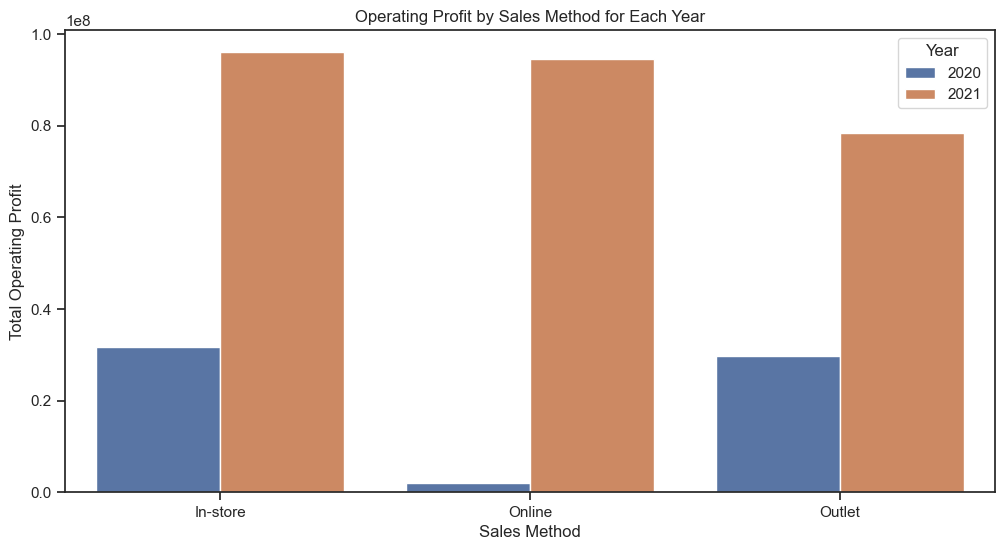

In [34]:
# creating fig. size
plt.figure(figsize=(12, 6))

sns.barplot(x='Sales_Method', y='Operating_Profit', hue='Year', data=profit_by_sales_method,)
plt.title('Operating Profit by Sales Method for Each Year')
plt.xlabel('Sales Method')
plt.ylabel('Total Operating Profit')
plt.legend(title='Year')

plt.show()


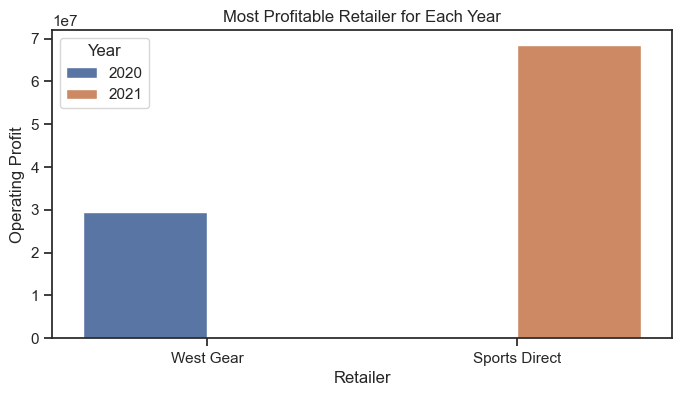

In [37]:
#creating fig. size
plt.figure(figsize=(8, 4))

sns.barplot(x='Retailer', y='Operating_Profit', hue='Year', data=most_profitable_retailer, )
plt.title('Most Profitable Retailer for Each Year')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.legend(title='Year')


plt.show()


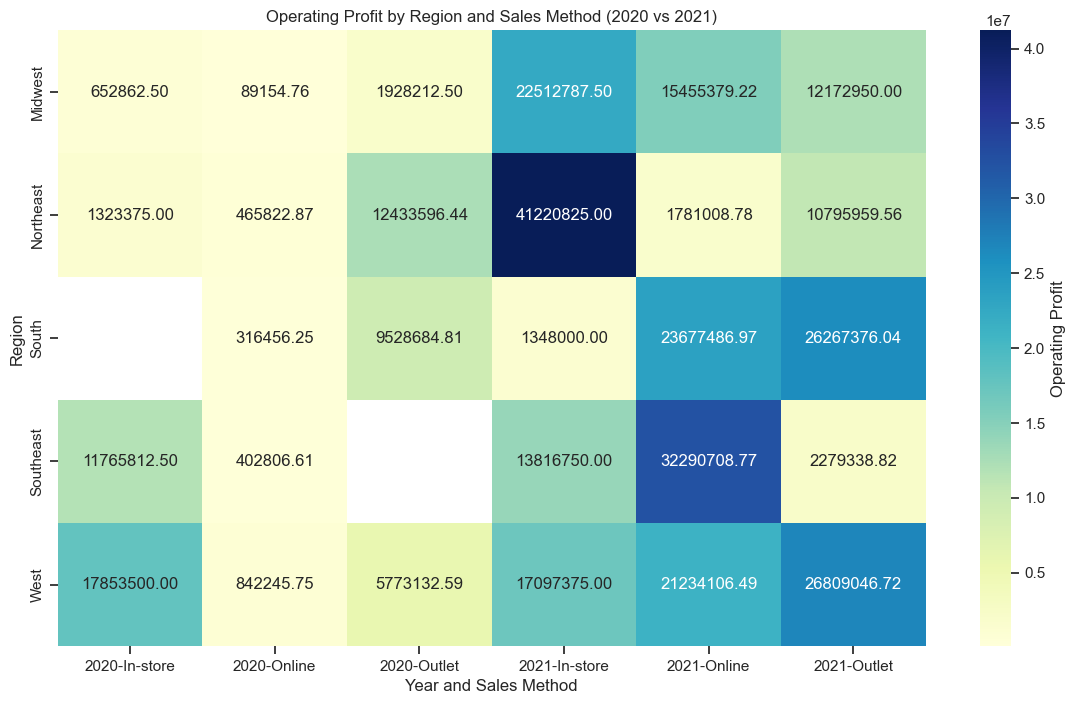

In [35]:
# creating fig. size
plt.figure(figsize=(14, 8))

# heatmap vizualization 
sns.heatmap(profit_region_sales_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Operating Profit'})
plt.title('Operating Profit by Region and Sales Method (2020 vs 2021)')
plt.xlabel('Year and Sales Method')
plt.ylabel('Region')
plt.show()


In [ ]:
'''
 INSIGHTS FROM THE HEATMAP ABOVE:

1. Growth Trends: Notably, the sales figures for 2021 show significant growth compared to 2020 in most
regions and sales methods, indicating an overall improvement in sales performance for Adidas.

2. Sales Method Comparison: The data allows for analyzing which sales methods are most effective in 
different regions. For instance, In-store sales in the Midwest and Northeast regions were substantial 
in both years, while the Online sales surged in the South in 2021, indicating a shift in consumer
purchasing behavior.

3. Data Gaps: There are NaN (Not a Number) values in the data, particularly in the South for the 
In-store sales in 2020 and for the Outlet sales in the Southeast region. This might indicate either 
no sales occurred through these methods or missing data that requires further investigation.

'''

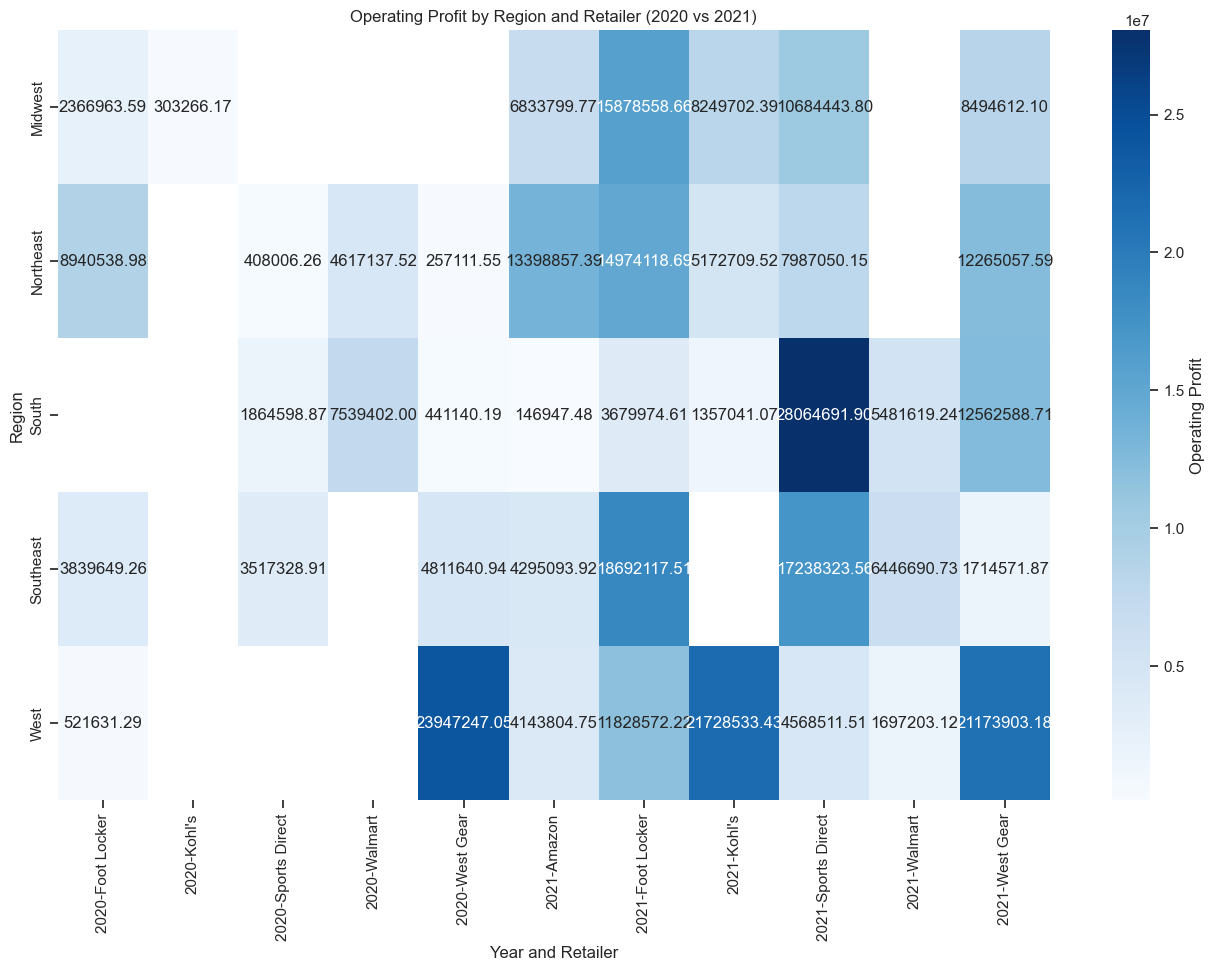

In [36]:
# creating fig. size
plt.figure(figsize=(16, 10))

# heatmap vizualization
sns.heatmap(profit_region_retailer_pivot, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Operating Profit'})
plt.title('Operating Profit by Region and Retailer (2020 vs 2021)')
plt.xlabel('Year and Retailer')
plt.ylabel('Region')

plt.show()


In [ ]:
'''
INSIGHTS FROM HEATMAP ABOVE:

1. Operating profit Performance: The data indicates varying performance levels across retailers and 
regions. For instance, in the Midwest, Foot Locker significantly increased its sales from 
2020 to 2021, showcasing its strength in that region.

2. Retailer Comparison: Retailers like Amazon and Walmart appear to have robust sales figures in
multiple regions, particularly in 2021, which may indicate a successful adaptation to market demands.

3. Data Gaps: NaN values suggest missing data points for certain retailer-region combinations. 
This may indicate either no sales occurred through those channels or simply incomplete records that
could be addressed for a more comprehensive analysis.

The use of the ‘Blues’ colormap in the heatmap offers a clear and engaging visual representation of 
operating profit data, making it easy to understand at a glance. looking at the varying shades of 
blue, this can quickly help in identifying which retailers and regions are thriving and which ones
might require some strategic tweaks to boost profitability. This visual tool is not just informative;
it's essential for making data-driven decisions. And also, to concentrate efforts on the areas that 
present the most potential for growth and improvement. Ultimately, this helps to drive better results 
and strengthen the product market position.

This viz. serves as a vital tool for assessing how Adidas has performed across its various retail
partners and regions, highlighting trends that could inform future sales strategies and marketing 
initiatives.


'''